<a href="https://colab.research.google.com/github/nwidyant9/Project00/blob/main/linreg_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/Internship/dummy.csv'

In [ ]:
dset = pd.read_csv(data_path)

In [ ]:
dset.head(15)

,Bulan,Code,Mesin,Load_time,Freq,Menit,Target
0,2023-01-01,44927DGM 3,DGM 3,2756.816667,5.0,24.950000,0.015
1,2023-01-01,44927DGM 2 (KORAN),DGM 2 (KORAN),NaN,NaN,NaN,NaN
2,2023-01-01,44927,NaN,NaN,NaN,NaN,NaN
3,2023-01-01,44927DGM 1,DGM 1,14434.450000,12.0,252.950000,0.020
4,2023-01-01,44927DGM 2,DGM 2,NaN,NaN,NaN,0.020
5,2023-01-01,44927GOSS 546,GOSS 546,NaN,NaN,NaN,0.035
6,2023-01-01,44927SOLNA 578,SOLNA 578,17466.383333,20.0,386.833333,0.020
7,2023-01-01,44927SOLNA 301,SOLNA 301,21371.566667,18.0,758.183333,0.030
8,2023-01-01,44927SOLNA 630 L1,SOLNA 630 L1,2107.383333,3.0,106.466667,0.030
9,2023-01-01,44927SOLNA 630 L2,SOLNA 630 L2,4487.216667,11.0,309.066667,0.030


In [ ]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Bulan      66 non-null     object 
 1   Code       66 non-null     object 
 2   Mesin      60 non-null     object 
 3   Load_time  44 non-null     float64
 4   Freq       43 non-null     float64
 5   Menit      43 non-null     float64
 6   Target     52 non-null     float64
dtypes: float64(4), object(3)
memory usage: 3.7+ KB


In [ ]:
dset = dset.drop(['Bulan', 'Code'], axis=1)

In [ ]:
dset.head(15)

,Mesin,Load_time,Freq,Menit,Target
0,DGM 3,2756.816667,5.0,24.950000,0.015
1,DGM 2 (KORAN),NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,DGM 1,14434.450000,12.0,252.950000,0.020
4,DGM 2,NaN,NaN,NaN,0.020
5,GOSS 546,NaN,NaN,NaN,0.035
6,SOLNA 578,17466.383333,20.0,386.833333,0.020
7,SOLNA 301,21371.566667,18.0,758.183333,0.030
8,SOLNA 630 L1,2107.383333,3.0,106.466667,0.030
9,SOLNA 630 L2,4487.216667,11.0,309.066667,0.030


In [ ]:
dset['BD_percent'] = dset['Menit'] / dset['Load_time']

In [ ]:
dset.head(15)

,Mesin,Load_time,Freq,Menit,Target,BD_percent
0,DGM 3,2756.816667,5.0,24.950000,0.015,0.009050
1,DGM 2 (KORAN),NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,DGM 1,14434.450000,12.0,252.950000,0.020,0.017524
4,DGM 2,NaN,NaN,NaN,0.020,NaN
5,GOSS 546,NaN,NaN,NaN,0.035,NaN
6,SOLNA 578,17466.383333,20.0,386.833333,0.020,0.022147
7,SOLNA 301,21371.566667,18.0,758.183333,0.030,0.035476
8,SOLNA 630 L1,2107.383333,3.0,106.466667,0.030,0.050521
9,SOLNA 630 L2,4487.216667,11.0,309.066667,0.030,0.068877


In [ ]:
dset = dset.dropna()

In [ ]:
dset.head(15)

,Mesin,Load_time,Freq,Menit,Target,BD_percent
0,DGM 3,2756.816667,5.0,24.950000,0.015,0.009050
3,DGM 1,14434.450000,12.0,252.950000,0.020,0.017524
6,SOLNA 578,17466.383333,20.0,386.833333,0.020,0.022147
7,SOLNA 301,21371.566667,18.0,758.183333,0.030,0.035476
8,SOLNA 630 L1,2107.383333,3.0,106.466667,0.030,0.050521
9,SOLNA 630 L2,4487.216667,11.0,309.066667,0.030,0.068877
11,DGM 3,2643.233333,7.0,105.150000,0.015,0.039781
14,DGM 1,10345.233333,7.0,123.983333,0.020,0.011985
15,DGM 2,1743.816667,2.0,68.933333,0.020,0.039530
17,SOLNA 578,15996.883333,4.0,61.933333,0.020,0.003872


In [ ]:
dset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 65
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mesin       43 non-null     object 
 1   Load_time   43 non-null     float64
 2   Freq        43 non-null     float64
 3   Menit       43 non-null     float64
 4   Target      43 non-null     float64
 5   BD_percent  43 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.4+ KB


In [ ]:
dset['Mesin'].value_counts()

DGM 3           6
DGM 1           6
SOLNA 301       6
SOLNA 578       5
SOLNA 630 L1    5
SOLNA 630 L2    5
SOLNA 630 L3    4
DGM 2           3
GOSS 546        3
Name: Mesin, dtype: int64

In [ ]:
dset = dset.drop(['Mesin', 'Target'], axis=1)

In [ ]:
dset.head(15)

,Load_time,Freq,Menit,BD_percent
0,2756.816667,5.0,24.950000,0.009050
3,14434.450000,12.0,252.950000,0.017524
6,17466.383333,20.0,386.833333,0.022147
7,21371.566667,18.0,758.183333,0.035476
8,2107.383333,3.0,106.466667,0.050521
9,4487.216667,11.0,309.066667,0.068877
11,2643.233333,7.0,105.150000,0.039781
14,10345.233333,7.0,123.983333,0.011985
15,1743.816667,2.0,68.933333,0.039530
17,15996.883333,4.0,61.933333,0.003872


In [ ]:
scaler = MinMaxScaler()
norm_dset = scaler.fit_transform(dset)

In [ ]:
norm_dset = pd.DataFrame(norm_dset, columns=dset.columns)

In [ ]:
norm_dset.head(15)

,Load_time,Freq,Menit,BD_percent
0,0.081575,0.058824,0.000000,0.030139
1,0.563262,0.161765,0.130358,0.079455
2,0.688325,0.279412,0.206905,0.106362
3,0.849409,0.250000,0.419222,0.183934
4,0.054787,0.029412,0.046607,0.271490
5,0.152952,0.147059,0.162442,0.378321
6,0.076890,0.088235,0.045854,0.208986
7,0.394587,0.088235,0.056622,0.047216
8,0.039791,0.014706,0.025147,0.207527
9,0.627710,0.044118,0.021145,0.000000


In [ ]:
x = norm_dset[['Load_time', 'Freq', 'Menit']]
y = dset['BD_percent']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=11)

MODEL 1

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
print(x_test)

    Load_time      Freq     Menit
32   0.932980  0.455882  0.531131
23   0.559056  0.205882  0.231442
26   0.239849  0.161765  0.209230
34   0.078482  0.058824  0.012597
8    0.039791  0.014706  0.025147
22   0.258478  0.264706  0.456929
15   0.001259  0.000000  0.003411
9    0.627710  0.044118  0.021145
21   0.348137  0.044118  0.019963


In [ ]:
print(y_test)

51    0.040770
40    0.029984
43    0.059282
55    0.017519
15    0.039530
39    0.116973
27    0.038183
17    0.003872
36    0.006494
Name: BD_percent, dtype: float64


In [ ]:
print("Prediction values:", y_pred)

Prediction values: [ 0.02956011  0.02837509  0.06042418  0.04711551  0.05619263  0.09818746
  0.05709496 -0.0080156   0.02109231]


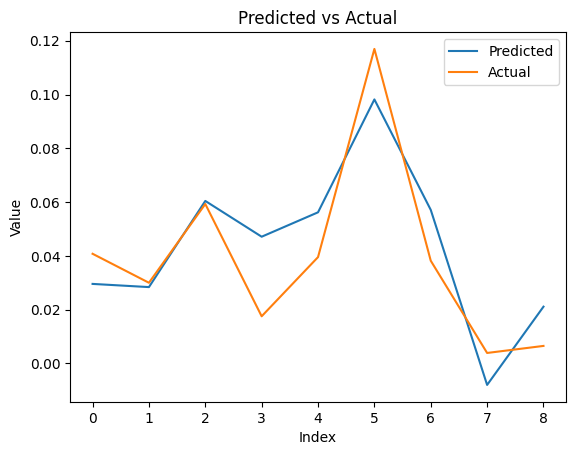

In [ ]:
plt.plot(range(len(y_pred)), y_pred, label='Predicted')
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 0.0002609008380735203


In [ ]:
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

R-squared: 0.7482808645150543


MODEL 2

In [ ]:
lr = tf.keras.models.Sequential()

lr.add(tf.keras.layers.Dense(1, input_shape=(3,)))

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.MeanSquaredError()
epochs = 2500

In [ ]:
lr.compile(optimizer=optimizer, loss=loss_function)
history = lr.fit(x_train, y_train, epochs=epochs, validation_data=(x_test, y_test))

Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 1s 337ms/step - loss: 0.1387 - val_loss: 0.1121
Epoch 2/2500
2/2 [==============================] - 0s 64ms/step - loss: 0.1362 - val_loss: 0.1102
Epoch 3/2500
2/2 [==============================] - 0s 45ms/step - loss: 0.1339 - val_loss: 0.1084
Epoch 4/2500
2/2 [==============================] - 0s 43ms/step - loss: 0.1317 - val_loss: 0.1068
Epoch 5/2500
2/2 [==============================] - 0s 48ms/step - loss: 0.1295 - val_loss: 0.1052
Epoch 6/2500
2/2 [==============================] - 0s 71ms/step - loss: 0.1275 - val_loss: 0.1035
Epoch 7/2500
2/2 [==============================] - 0s 58ms/step - loss: 0.1254 - val_loss: 0.1018
Epoch 8/2500
2/2 [==============================] - 0s 167ms/step - loss: 0.1233 - val_loss: 0.1001
Epoch 9/2500
2/2 [==============================] - 0s 116ms/step - loss: 0.1212 - val_loss: 0.0984
Epoch 10/2500
2/2 [==============================] - 0s 129ms/step -

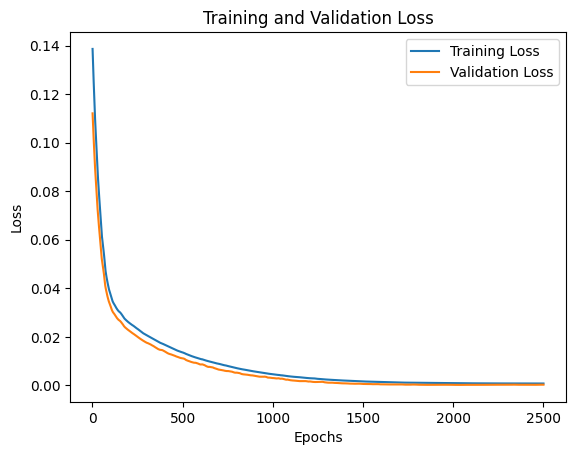

In [ ]:
loss_values = history.history['loss']
val_loss_values = history.history['val_loss']
plt.plot(range(1, len(loss_values) + 1), loss_values, label='Training Loss')
plt.plot(range(1, len(loss_values) + 1), val_loss_values, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
y_predict = lr.predict(x_test)

1/1 [==============================] - 0s 124ms/step


In [ ]:
print("Prediction values:", y_predict)

Prediction values: [[ 0.02305092]
 [ 0.02561135]
 [ 0.05984834]
 [ 0.04476541]
 [ 0.05745588]
 [ 0.10177808]
 [ 0.05840119]
 [-0.00926547]
 [ 0.01993911]]


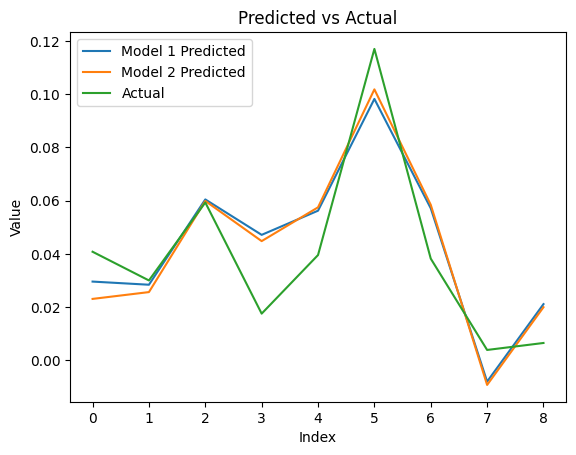

In [ ]:
plt.plot(range(len(y_pred)), y_pred, label='Model 1 Predicted')
plt.plot(range(len(y_predict)), y_predict, label='Model 2 Predicted')
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predicted vs Actual')
plt.legend()
plt.show()